In [23]:
# Analysis of the Spotify dataset
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except ModuleNotFoundError:
    %pip install seaborn
    import seaborn as sns



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 2.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1
Note: you may need to restart the kernel to use updated packages.


# Data preprocessing

In this part, required datasets are merged with each other.

In [2]:
FEATURES_PATH = '../data/audio_features_processed.csv'
CHARTS_PATH = '../data/charts.csv'

# Load the data
features = pd.read_csv(FEATURES_PATH)
charts = pd.read_csv(CHARTS_PATH)

# Merge the data, use charts["url"].split("/")[-1] to get the track id and match it with features["track_id"]
charts["track_id"] = [url.split("/")[-1] for url in charts["url"]]

# Drop all the tracks that are not in the features dataset
charts = charts[charts["track_id"].isin(features["track_id"])]

# Merge the data
data = pd.merge(charts, features, on="track_id")

In [4]:
data.columns, data.shape

(Index(['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend',
        'streams', 'track_id', 'danceability', 'energy', 'key', 'loudness',
        'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
        'duration_ms', 'time_signature'],
       dtype='object'),
 (26173375, 28))

In [21]:
data.head(5)

,title,rank,date,artist,url,region,chart,trend,streams,track_id,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,6mICuAdrwEjh6Y6lroV2Kg,...,0.159,0.907,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840,4
1,Chantaje (feat. Maluma),138,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Australia,top200,NEW_ENTRY,13216.0,6mICuAdrwEjh6Y6lroV2Kg,...,0.159,0.907,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840,4
2,Chantaje (feat. Maluma),62,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Austria,top200,MOVE_UP,3245.0,6mICuAdrwEjh6Y6lroV2Kg,...,0.159,0.907,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840,4
3,Chantaje (feat. Maluma),61,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Belgium,top200,MOVE_UP,4635.0,6mICuAdrwEjh6Y6lroV2Kg,...,0.159,0.907,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840,4
4,Chantaje (feat. Maluma),3,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Bolivia,top200,SAME_POSITION,5506.0,6mICuAdrwEjh6Y6lroV2Kg,...,0.159,0.907,102.034,audio_features,6mICuAdrwEjh6Y6lroV2Kg,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,https://api.spotify.com/v1/audio-analysis/6mIC...,195840,4


In [18]:
# Transform str date of year-month-day to datetime
data["date"] = pd.to_datetime(data["date"])

# Assure that it is compatible with datetime.date
data["date"] = data["date"].apply(lambda x: x.date())


# Util libraries (Will be moved to utils module later on)


In [34]:
from typing import List, Tuple, Union
import datetime

def get_regional_data(df, countries: List[str]):
    """Get the data for the given countries"""
    return df[df["region"].isin(countries)]

def get_date_data(df, date: Union[datetime.date, Tuple[datetime.date, datetime.date]]):
    """Get the data for the given date
    If tuple is given, return the data between the dates"""
    if isinstance(date, (tuple,list)):
        return df[(df["date"] >= date[0]) & (df["date"] <= date[1])]
    else:
        return df[df["date"] == date]
    

# This should give 200 + 50 songs for top200 + viral50
get_date_data(get_regional_data(data, ["Germany"]), datetime.date(2017, 1, 1)).shape


(250, 28)

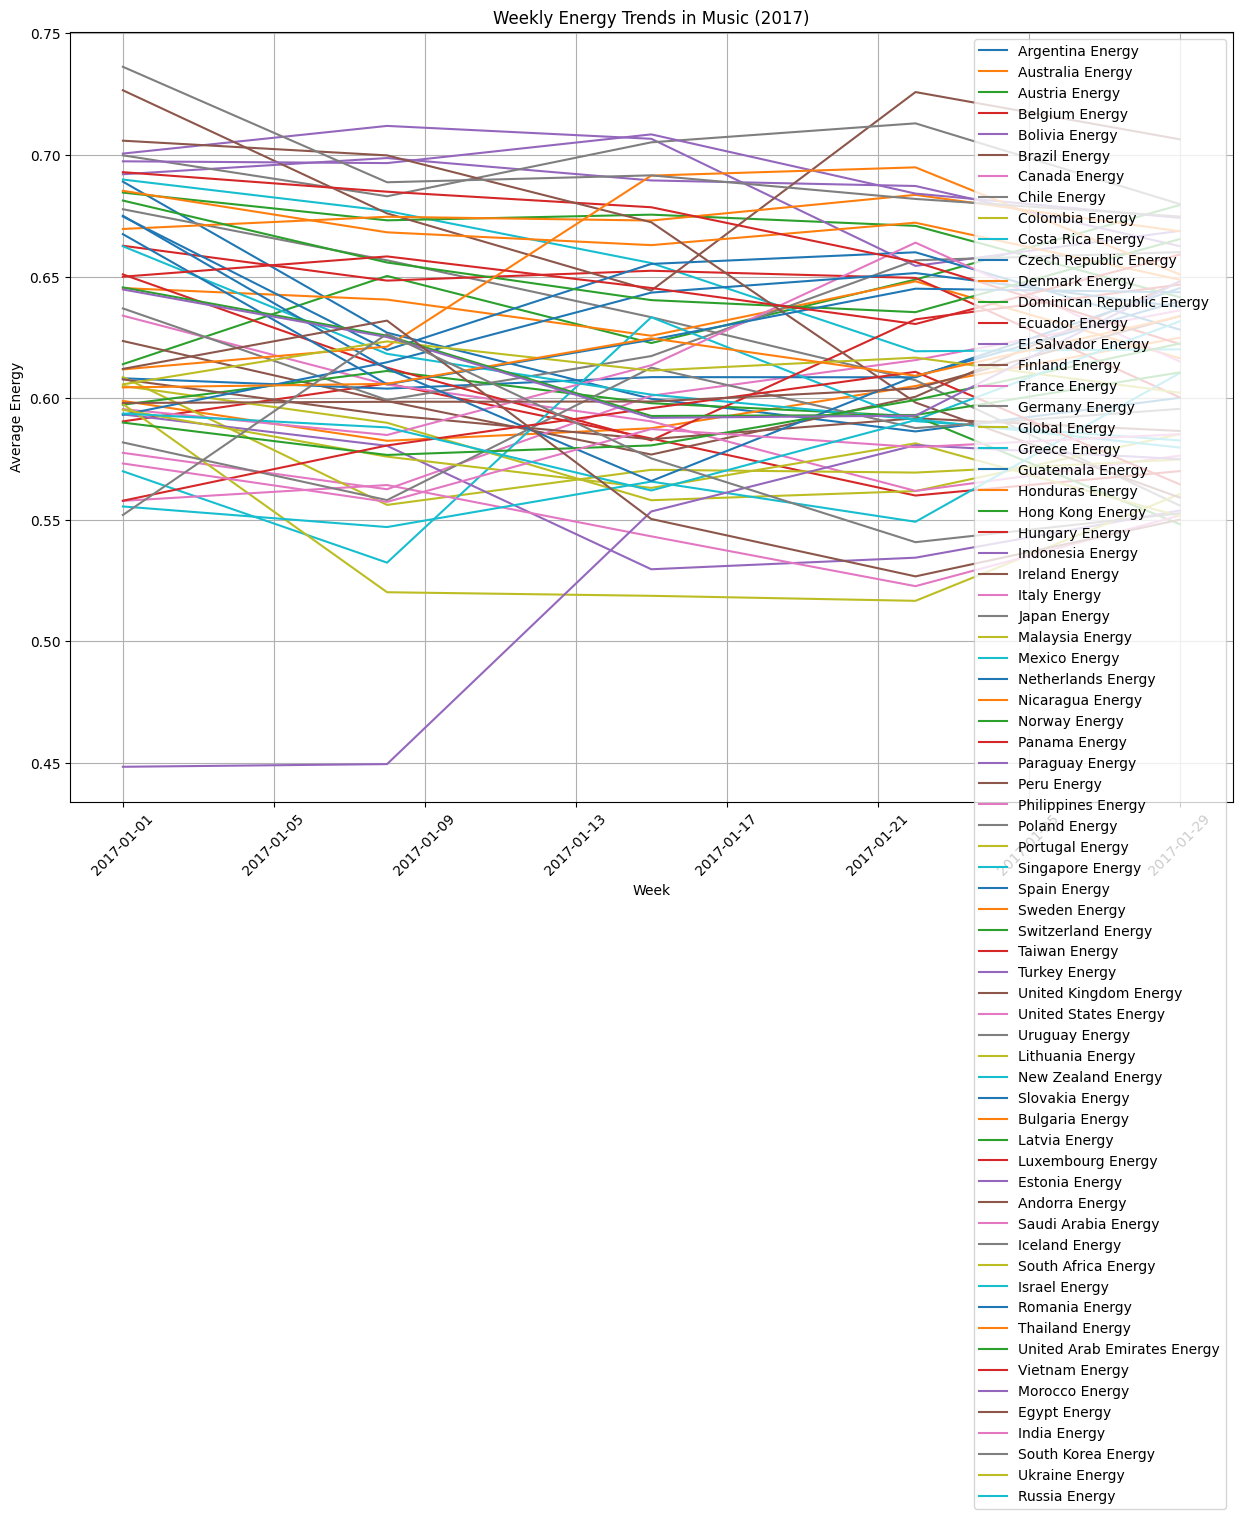

In [41]:

COUNTRIES = data["region"].unique()
AUDIO_FEATURES_COLUMNS = ("danceability", "energy", "loudness")

# Weekly date range
date_range = pd.date_range(start="2017-01-01", end="2017-02-01", freq="W").date

# Initialize a dictionary to store weekly averages for each country
weekly_averages = {country: pd.DataFrame(index=date_range, columns=AUDIO_FEATURES_COLUMNS) for country in COUNTRIES}

for country in COUNTRIES:
    country_data = get_regional_data(data, [country])
    for week_start in date_range:
        week_end = week_start + pd.Timedelta(weeks=1)
        weekly_data = get_date_data(country_data[country_data["chart"] == "viral50"], (week_start, week_end))
        for feature in AUDIO_FEATURES_COLUMNS:
            weekly_averages[country].loc[week_start, feature] = weekly_data[feature].mean()

plt.figure(figsize=(15, 10))
for country in COUNTRIES:
    plt.plot(weekly_averages[country].index, weekly_averages[country]['energy'], label=f"{country} Energy")

plt.title("Weekly Energy Trends in Music (2017)")
plt.xlabel("Week")
plt.ylabel("Average Energy")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# refresh pip so geopandas can be installed
%pip install --upgrade pip
%pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 844.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 1.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 853.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 845.0 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/var/folders/ml/xqpw1bd16gx6lwbbzz68kl_c0000gn/T/ipykernel_5644/1387960163.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


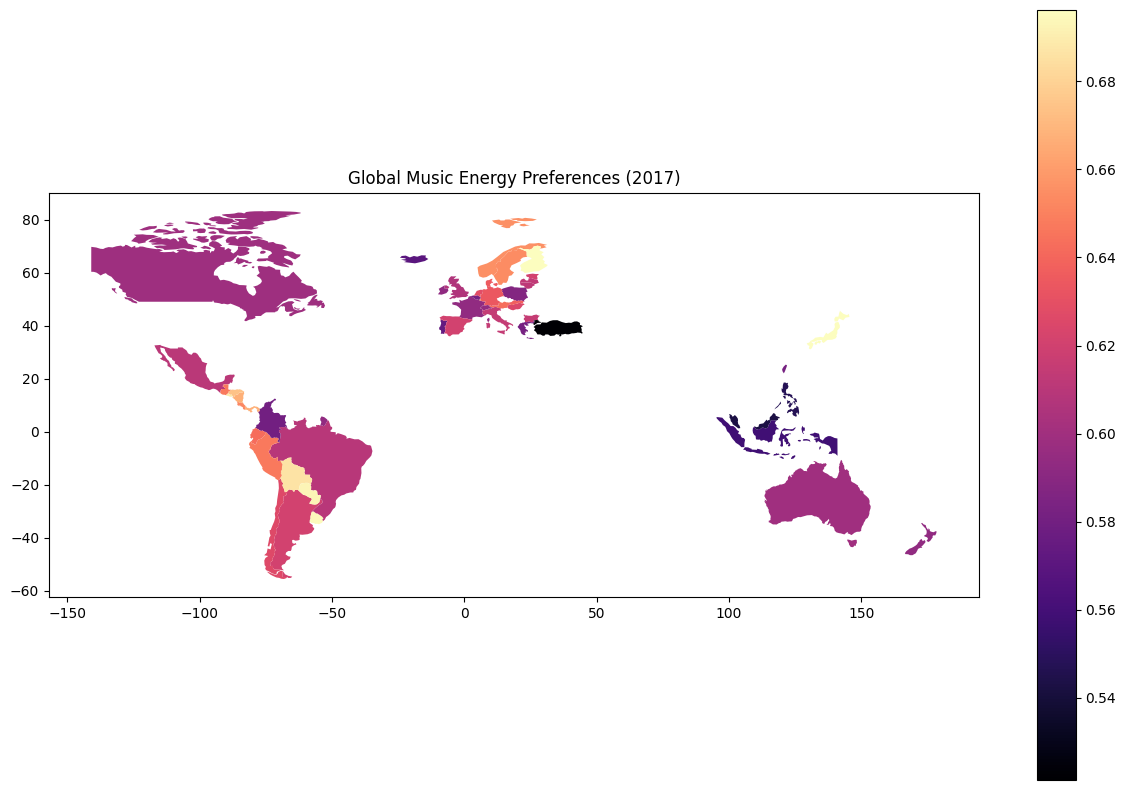

In [46]:
import geopandas as gpd

# Assuming you have computed the average 'energy' value for each country over the year
# Let's say you have a DataFrame 'country_energy_avg' with columns 'country' and 'average_energy'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the average energy data with the world GeoDataFrame
country_energy_avg = pd.DataFrame({"country": COUNTRIES, "average_energy": [weekly_averages[country]["energy"].mean() for country in COUNTRIES]})
world = world.merge(country_energy_avg, how="left", left_on="name", right_on="country")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Use a dark cmap without a white color, use magma
cmap = plt.cm.get_cmap('magma')
world.plot(column='average_energy', ax=ax, legend=True, cmap = cmap)
plt.title('Global Music Energy Preferences (2017)')
plt.show()


/var/folders/ml/xqpw1bd16gx6lwbbzz68kl_c0000gn/T/ipykernel_5644/44385810.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


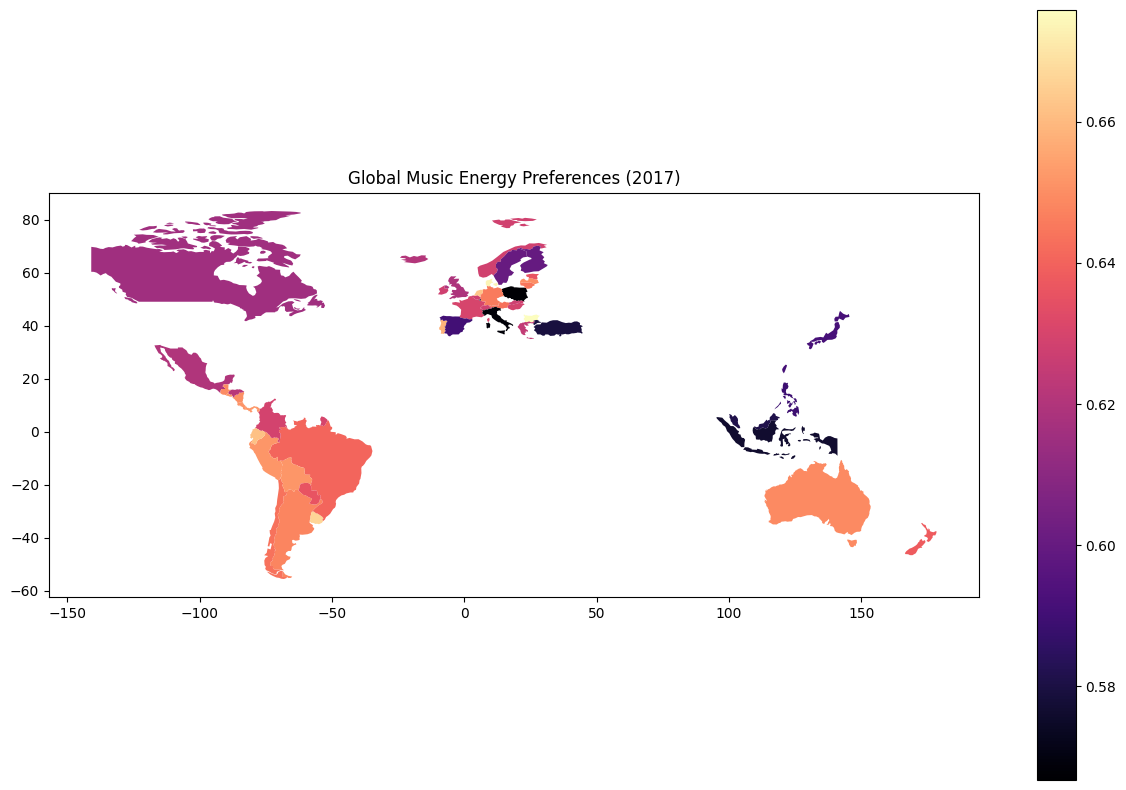

In [52]:
import geopandas as gpd

# Assuming you have computed the average 'energy' value for each country over the year
# Let's say you have a DataFrame 'country_energy_avg' with columns 'country' and 'average_energy'

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the average energy data with the world GeoDataFrame
country_energy_avg = pd.DataFrame({"country": COUNTRIES, "average_energy": [weekly_averages[country]["danceability"].mean() for country in COUNTRIES]})
world = world.merge(country_energy_avg, how="left", left_on="name", right_on="country")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Use a dark cmap without a white color, use magma
cmap = plt.cm.get_cmap('magma')
world.plot(column='average_energy', ax=ax, legend=True, cmap = cmap)
plt.title('Global Music Energy Preferences (2017)')
plt.show()


In [56]:
# Find the countries in the data DataFrame that does not have any NaN values in the streams column.
grouped_data = data.groupby('region')
# Initialize a list to hold countries without any NaN values in 'streams'
countries_without_nan = []

# Iterate through each group
for country, group in grouped_data:
    if not group['streams'].isna().any():
        countries_without_nan.append(country)

# countries_without_nan now contains the list of countries without any NaN values in the 'streams' column
print(countries_without_nan)


[]
